In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\Skill-Lync\Downloads\SMS_Dataset_ SPAM_Week 11.csv")

In [3]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
data.label = data.label.map({"ham":1,"spam":0})


In [7]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
lm = WordNetLemmatizer()
pt = PorterStemmer()

### TEXT PREPROCCESSING

1.  Lower case
2.  Removing Puncuation and Digits
3.  Spliting text
4.  Lemmatizing and removing stop words


In [9]:
stop_word = set(stopwords.words('english'))
def remove_punct(text):
    text = text.lower()
    text = "".join([char for char in text if (char not in string.punctuation) and (char not in string.digits)])
    text = text.split()
    text2 = [lm.lemmatize(i) for i in text if i not in stop_word]
    final_text = " ".join(text2)
    return final_text

In [10]:
data['text_clean'] = data['message'].apply(lambda x: remove_punct(x))

data.head()

,label,message,text_clean
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,1,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [11]:
x = data.text_clean
y = data.label

### TOKENIZATION

In [12]:
from keras_preprocessing.text import Tokenizer
tokenizer = Tokenizer() #initializing the tokenizer
tokenizer.fit_on_texts(x)
text_to_sequence = tokenizer.texts_to_sequences(x) 

In [13]:
maxseqlen = max([len(i.split()) for i in x])
input_dim = len(tokenizer.word_index)+1
print(maxseqlen)
print(input_dim)

80
8049


### PAD SEQUENCES

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
x = pad_sequences(text_to_sequence, maxlen=maxseqlen, padding = "pre")
y = y
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4179, 80) (4179,)
(1393, 80) (1393,)


### USING LSTM MODEL

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Embedding, Dense, GlobalMaxPool1D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(Embedding(input_dim = 8049, output_dim = 32, input_length = 80))
model.add(LSTM((128), return_sequences = True))
model.add(Dropout(0.4))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))



model.compile(optimizer="adam", loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 32)            257568    
                                                                 
 lstm (LSTM)                 (None, 80, 128)           82432     
                                                                 
 dropout (Dropout)           (None, 80, 128)           0         
                                                                 
 dense (Dense)               (None, 80, 20)            2580      
                                                                 
 dropout_1 (Dropout)         (None, 80, 20)            0         
                                                                 
 dense_1 (Dense)             (None, 80, 1)             21        
                                                                 
Total params: 342,601
Trainable params: 342,601
Non-trai

In [19]:
import warnings
warnings.filterwarnings('ignore')
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train,
                    batch_size = 16,epochs =30 , validation_split=0.2,validation_data=(x_test,y_test),callbacks=early_stop)

Epoch 1/30
262/262 [==============================] - 26s 84ms/step - loss: 0.4143 - accuracy: 0.8706 - val_loss: 0.3562 - val_accuracy: 0.8857
Epoch 2/30
262/262 [==============================] - 19s 73ms/step - loss: 0.3714 - accuracy: 0.8838 - val_loss: 0.3484 - val_accuracy: 0.8874
Epoch 3/30
262/262 [==============================] - 19s 74ms/step - loss: 0.3605 - accuracy: 0.8859 - val_loss: 0.3513 - val_accuracy: 0.8881
Epoch 4/30
262/262 [==============================] - 20s 75ms/step - loss: 0.3591 - accuracy: 0.8867 - val_loss: 0.3426 - val_accuracy: 0.8883
Epoch 5/30
262/262 [==============================] - 20s 75ms/step - loss: 0.3530 - accuracy: 0.8876 - val_loss: 0.3466 - val_accuracy: 0.8887
Epoch 6/30
262/262 [==============================] - 20s 77ms/step - loss: 0.3499 - accuracy: 0.8880 - val_loss: 0.3422 - val_accuracy: 0.8888
Epoch 7/30
262/262 [==============================] - 20s 76ms/step - loss: 0.3493 - accuracy: 0.8882 - val_loss: 0.3501 - val_accuracy:

### ACCURACY VISUALIZATION OF LSTM

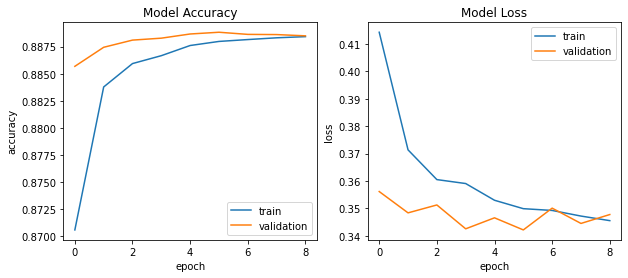

In [21]:
from matplotlib import pyplot as plt
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

### BI-DIRECTIONAL MODEL

In [22]:
from tensorflow.keras.layers import Bidirectional

model2 = Sequential()
model2.add(Embedding(input_dim =input_dim, output_dim = 32, input_length = maxseqlen))
model2.add(Bidirectional(LSTM((128), return_sequences = True)))
model2.add(Dropout(0.4))
model2.add(Dense(20, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))


In [23]:
model2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

In [24]:
import warnings
warnings.filterwarnings('ignore')
history2 = model2.fit(x_train,y_train,epochs =30,batch_size = 16, validation_split=0.2,validation_data=(x_test,y_test),
                     callbacks=early_stop)

Epoch 1/30
262/262 [==============================] - 37s 119ms/step - loss: 0.2475 - accuracy: 0.9324 - val_loss: 0.1216 - val_accuracy: 0.9643
Epoch 2/30
262/262 [==============================] - 28s 108ms/step - loss: 0.0999 - accuracy: 0.9802 - val_loss: 0.1058 - val_accuracy: 0.9676
Epoch 3/30
262/262 [==============================] - 28s 108ms/step - loss: 0.0530 - accuracy: 0.9911 - val_loss: 0.1356 - val_accuracy: 0.9709
Epoch 4/30
262/262 [==============================] - 30s 114ms/step - loss: 0.0374 - accuracy: 0.9944 - val_loss: 0.1153 - val_accuracy: 0.9841
Epoch 5/30
262/262 [==============================] - 31s 117ms/step - loss: 0.0270 - accuracy: 0.9966 - val_loss: 0.1040 - val_accuracy: 0.9867
Epoch 6/30
262/262 [==============================] - 29s 111ms/step - loss: 0.0196 - accuracy: 0.9974 - val_loss: 0.1287 - val_accuracy: 0.9804
Epoch 7/30
262/262 [==============================] - 29s 110ms/step - loss: 0.0147 - accuracy: 0.9983 - val_loss: 0.1438 - val_ac

### VISUALIZATION OF ACCURACY OF BI-DIRECTIONAL

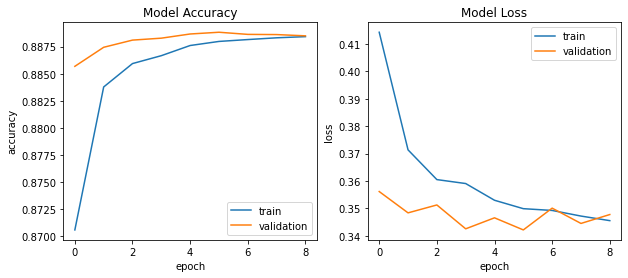

In [27]:
from matplotlib import pyplot as plt
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

### SIMPLE DENSE MODEL

In [55]:
model3 = Sequential()
model3.add(Embedding(input_dim= input_dim,output_dim=32,
                    input_length = maxseqlen))
model3.add(Dense(24, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(1, activation='sigmoid'))

In [56]:
model3.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics=['accuracy'])

In [57]:
import warnings
warnings.filterwarnings('ignore')
history3 = model3.fit(x_train,y_train,epochs =30,batch_size = 16, validation_split=0.2,validation_data=(x_test,y_test),
                     callbacks=early_stop)

Epoch 1/30
262/262 [==============================] - 3s 6ms/step - loss: 0.4754 - accuracy: 0.8617 - val_loss: 0.3905 - val_accuracy: 0.8686
Epoch 2/30
262/262 [==============================] - 1s 5ms/step - loss: 0.4100 - accuracy: 0.8650 - val_loss: 0.3909 - val_accuracy: 0.8686
Epoch 3/30
262/262 [==============================] - 1s 5ms/step - loss: 0.4057 - accuracy: 0.8659 - val_loss: 0.3920 - val_accuracy: 0.8693
Epoch 4/30
262/262 [==============================] - 2s 6ms/step - loss: 0.4028 - accuracy: 0.8676 - val_loss: 0.3942 - val_accuracy: 0.8638


### ACCURACY GRAPH OF DENSE MODEL

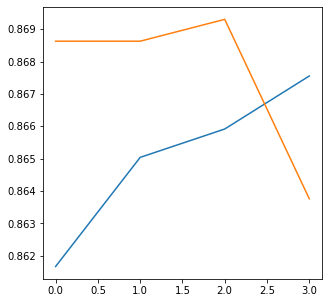

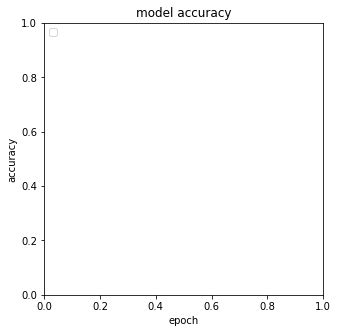

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot (history3.history['accuracy'])
plt.plot (history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

In [38]:
message = input("Enter the message")

text_to_sequence = tokenizer.texts_to_sequences(message) 
message= pad_sequences(text_to_sequence, maxlen=maxseqlen, padding = "pre")
pred = model2.predict(message)
if (pred.all()==0):
    print("message will go to spam")
else:
    print("check inbox")


Enter the messagejhj,kljkjkl
1/1 [==============================] - 0s 47ms/step
check inbox
